In [4]:
import sys
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime
from scipy.stats import qmc

from bo_methods_lib.GP_Validation_Norm import LOO_Analysis
# from bo_methods_lib.GP_Validation import LOO_Analysis
from bo_methods_lib.bo_functions_generic import gen_theta_set, find_train_doc_path, set_ep, clean_1D_arrays

import matplotlib as mpl

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

In [5]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M")
# DateTime = "2022/11/29/09-48"
DateTime = None ##For Testing

#Set Parameters
#Need to run at a and b, need 2 arrays to test that this will work
CS = 1

Constants = np.array([[-200,-100,-170,15],
                      [-1,-1,-6.5,0.7],
                      [0,0,11,0.6],
                      [-10,-10,-6.5,0.7],
                      [1,0,-0.5,-1],
                      [0,0.5,1.5,1]])
if CS == 2.2:
    skip_param_types = 1 #This is what changes for subpoint
    true_p = Constants[skip_param_types:skip_param_types+2].flatten()
    param_dict = {0 : 'a_1', 1 : 'a_2', 2 : 'a_3', 3 : 'a_4',
                  4 : 'b_1', 5 : 'b_2', 6 : 'b_3', 7 : 'b_4'}
    exp_d = 2
    n = 15 #Number of experimental data points to use
    bounds_x = np.array([[-1.5, -0.5],
                     [   1,    2]])
    bounds_p = np.array([[-2, -2, -10, -2, -2, -2,  5, -2],
                   [ 2,  2,   0,  2,  2,  2, 15,  2]])

else:
    Constants = true_p = np.array([1,-1])
    skip_param_types = 0
    param_dict = {0 : '\\theta_1', 1 : '\\theta_2'}
    exp_d = 1
    n = 5
    bounds_x = np.array([[-2], [2]])
    bounds_p = np.array([[-2, -2],
                         [ 2,  2]])

# print(Theta_True)
t = 20
d = len(true_p)
train_iter = 300
noise_std = 0.1
sep_fact = np.linspace(1,1,1)
set_lengthscale = None
explore_bias = 1
plot_axis = np.array([1,0])
norm = True
norm = False

# obj = np.array(["obj", "LN_obj"])
obj = np.array(["LN_obj"])

# emulator = np.array([False, True])
# emulator = np.array([True])
emulator =  np.array([False])
save_figure = True
save_figure = False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/d='+str(exp_d)+'/n='+str(n)+'.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1:exp_d+1]
Yexp = exp_data[:,-1]

Xexp = clean_1D_arrays(Xexp)

Date and Time:  16-Dec-2022 (14:05:59)


Emulator = False
Objective Function = LN_obj


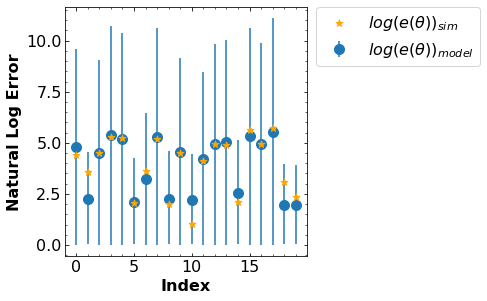

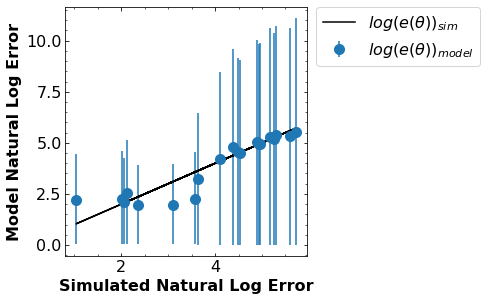

CPU times: user 16.3 s, sys: 68.5 ms, total: 16.4 s
Wall time: 16.5 s


In [6]:
%%time
for emul in emulator:
    print("Emulator =", emul)
    if emul == False:
        t_use = t
        obj_use = obj
    else:
        t_use = t*n
        obj_use = np.array(["obj"])
    for obj_func in obj_use:
        print("Objective Function =", obj_func)
        all_data_doc = find_train_doc_path(emul, obj_func, d, t_use)
        all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))
#         print(all_data)
#         choose_CS(CS)?
#         print(all_data)
        LOO_Analysis(all_data, Xexp, Yexp, Constants, true_p, emul, obj_func, CS,  
                     skip_param_types = skip_param_types, noise_std = noise_std, DateTime = DateTime, 
                     save_figure= save_figure, plot_axis = plot_axis, normalize = norm, bounds_p = bounds_p, 
                     bounds_x = bounds_x)        